# 0.0. Business Understanding

#### Stack Overflow Survey
##### Data:
- What: dataset with the results of a survey of developers in 2021
- Granularity: per respondent

##### Goal:
- Provide information about the Data Science Developers subset;
- Provide insights: 3 insights about the Data Scientists;
- Provide a Machine Learning Model to predict the salary of Data Scientists.

# 1.0. Imports

## 1.1. Frameworks

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## 1.2. Config

In [171]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
sns.set()

## 1.3. Data

In [172]:
df = pd.read_csv(r'./data/2021_survey_results.csv', sep=',') # import data

# 2.0. Data Understanding

In [173]:
df2 = df.copy()

## 2.1. Columns / Rows

In [174]:
print(f'Rows: {df2.shape[0]}')
print(f'Columns: {df2.shape[1]}')

Rows: 83439
Columns: 48


## 2.2. Dtypes

In [175]:
df2.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object


## 2.3. Null Values

In [176]:
df2.isnull().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

# 3.0. Filter Data

In [177]:
df3 = df2.copy()

## 3.1. Select Rows

In [178]:
# drop na values
df3 = df3.dropna(axis=0, subset=['DevType'])

# select only data scientists
df3 = df3.loc[df3['DevType'] == 'Data scientist or machine learning specialist', :]

## 3.2. Select Columns

In [179]:
df3 = df3.loc[:, ['ResponseId', 'Employment', 'YearsCode', 
              'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
              'PlatformHaveWorkedWith', 'ConvertedCompYearly']]

# 4.0. Exploratory Data Analysis

In [180]:
df4 = df3.copy()

In [181]:
def count_list_series(df, column, sep=';', only_values=False):
    """
    Input:
    df - pandas dataframe containing the column to be counted;
    column - columns with the list entries that must have the values counted;
    sep - the type of separator used in the list.
    describe - if True, return count and percentage. 
    
    Output:
    df - a new dataframe containing:
        Value: the name of the variable to be counted;
        Count: count of the variable;
        Percentage: the percentage of the value in relation to the number of lines.
    """
    final_list = []
    df_aux = df[column].dropna(axis=0) # droping na values to analysis. selecting only entries with a list
    for index, value in enumerate(df_aux):
        list_languages = value.split(sep)
        for language in list_languages:
            final_list.append(language)
            
    if only_values == False:
        value, counts = np.unique(final_list, return_counts=True)
        df_final = pd.DataFrame(counts, value).sort_values(by=0, ascending=False).reset_index().rename({'index': 'Value', 0: 'Count'}, axis=1)
        df_final['Percentage'] = round((100 * df_final['Count'] / len(df)), 2)
        
        return df_final
    
    else:
        
        return set(final_list)

## Q1 - What are the most used languages and tools by Data Scientists or machine learning especialists

### Top 3 Languages:
- **Python**: 92.72%
- **SQL**: 49.62%
- **R**: 31.11%

### Top 3 Databases:
- **PostgreSQL**: 33.69%
- **MySQL**: 33.38%
- **SQLite**: 21.40%

### Top 3 Platforms:
- **AWS**: 44.01%
- **Google Cloud**: 30.80%
- **Microsoft Azure**: 22.61%

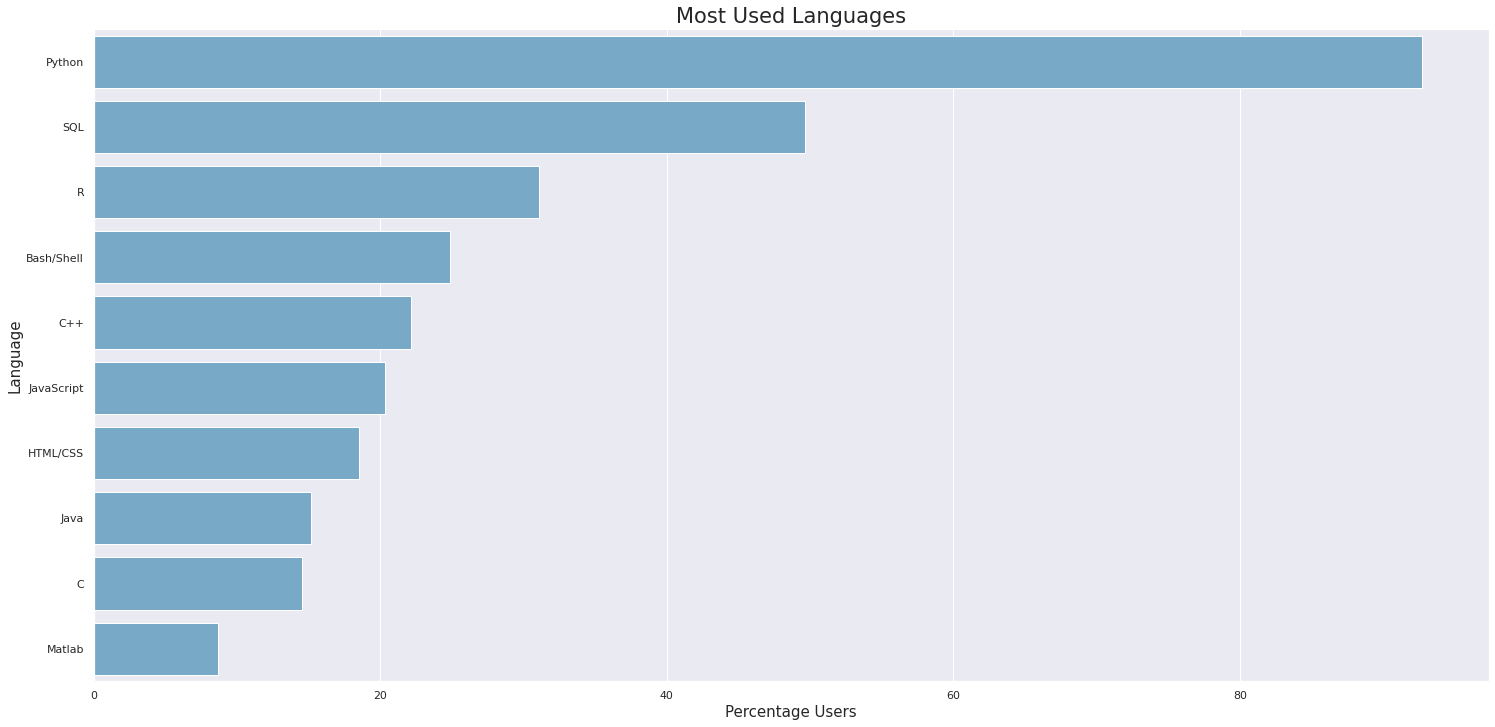

In [182]:
df_language = count_list_series(df=df4, column='LanguageHaveWorkedWith')
sns.barplot(x='Percentage', y='Value', data=df_language[:10], palette=sns.color_palette('Blues', 1))

# Graph configuration
plt.title('Most Used Languages', fontsize=21)
plt.xlabel('Percentage Users', fontsize=15)
plt.ylabel('Language', fontsize=15)

plt.savefig('./images/languages')

In [183]:
df_language.head(10)

,Value,Count,Percentage
0,Python,611,92.72
1,SQL,327,49.62
2,R,205,31.11
3,Bash/Shell,164,24.89
4,C++,146,22.15
5,JavaScript,134,20.33
6,HTML/CSS,122,18.51
7,Java,100,15.17
8,C,96,14.57
9,Matlab,57,8.65


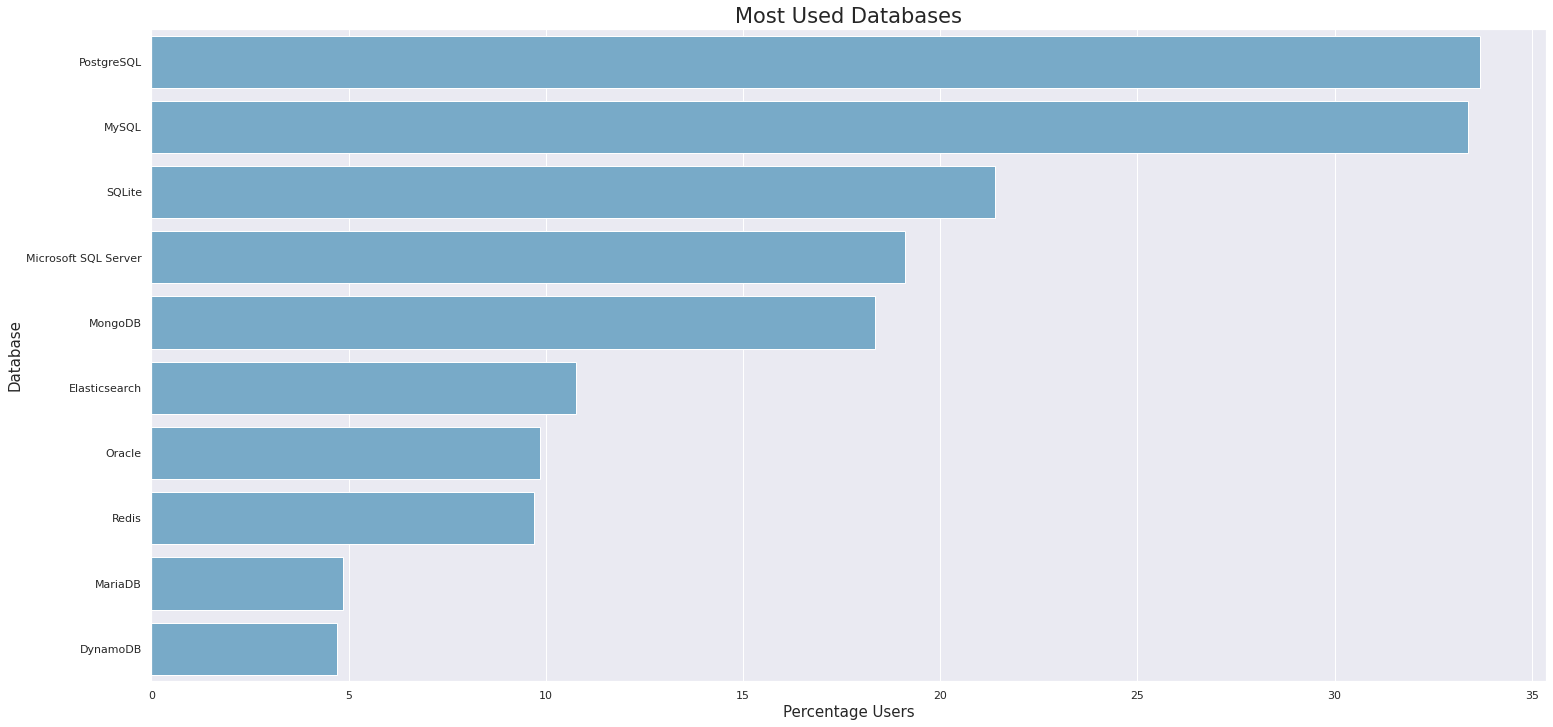

In [184]:
df_database = count_list_series(df=df4, column='DatabaseHaveWorkedWith')
sns.barplot(x='Percentage', y='Value', data=df_database[:10], palette=sns.color_palette('Blues', 1))

# Graph configuration
plt.title('Most Used Databases', fontsize=21)
plt.xlabel('Percentage Users', fontsize=15)
plt.ylabel('Database', fontsize=15)

plt.savefig('./images/databases')

In [185]:
df_database.head(10)

,Value,Count,Percentage
0,PostgreSQL,222,33.69
1,MySQL,220,33.38
2,SQLite,141,21.40
3,Microsoft SQL Server,126,19.12
4,MongoDB,121,18.36
5,Elasticsearch,71,10.77
6,Oracle,65,9.86
7,Redis,64,9.71
8,MariaDB,32,4.86
9,DynamoDB,31,4.70


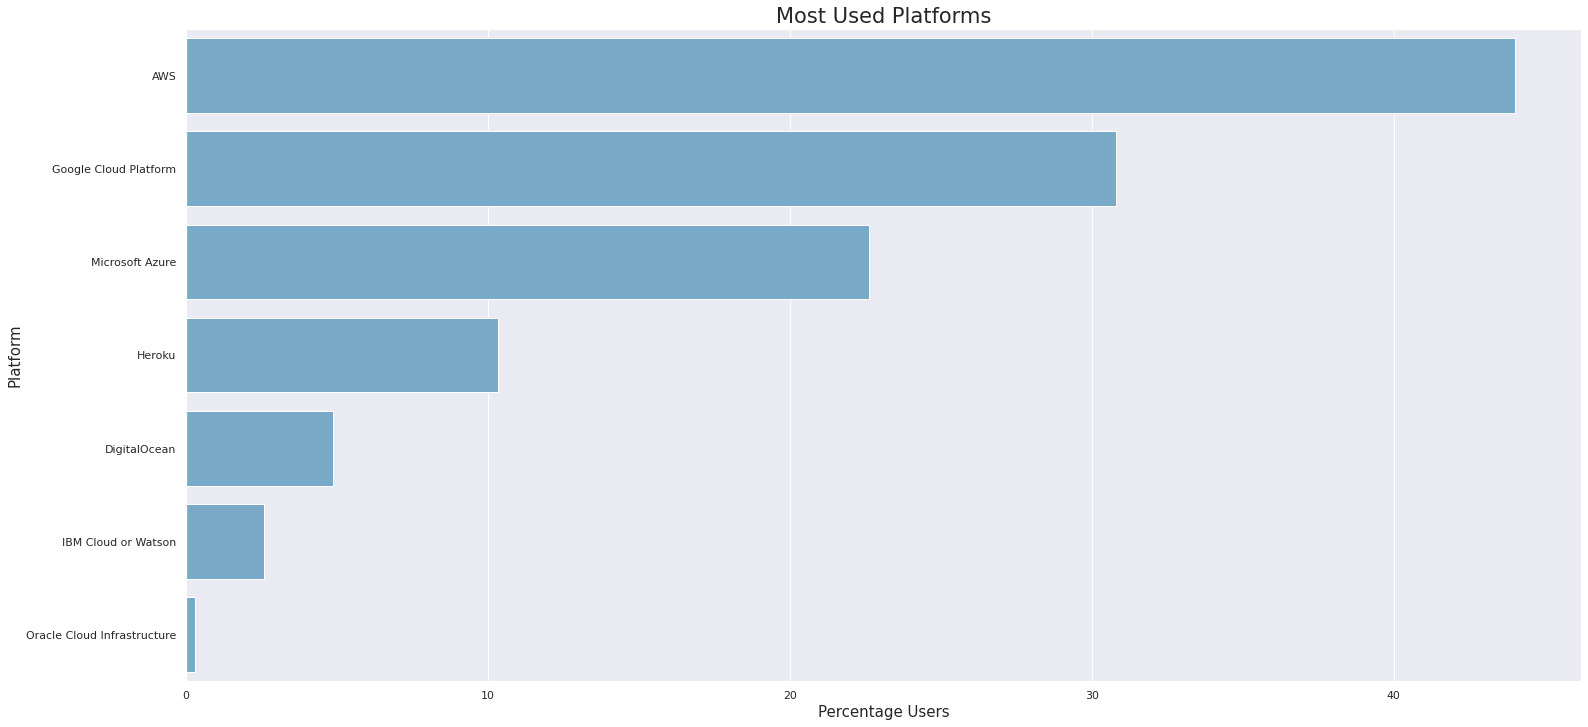

In [186]:
df_platform = count_list_series(df=df4, column='PlatformHaveWorkedWith')
sns.barplot(x='Percentage', y='Value', data=df_platform[:10], palette=sns.color_palette('Blues', 1))

# Graph configuration
plt.title('Most Used Platforms', fontsize=21)
plt.xlabel('Percentage Users', fontsize=15)
plt.ylabel('Platform', fontsize=15)

plt.savefig('./images/platforms')

In [187]:
df_platform.head(10)

,Value,Count,Percentage
0,AWS,290,44.01
1,Google Cloud Platform,203,30.80
2,Microsoft Azure,149,22.61
3,Heroku,68,10.32
4,DigitalOcean,32,4.86
5,IBM Cloud or Watson,17,2.58
6,Oracle Cloud Infrastructure,2,0.30


## Q2 - How long have data scientists been programming

### Experience:
- **0 -> 9**: 51.84%
- **10 -> 18.0**: 35.23
- **19 -> 27.0**: 7.84%
- **28 -> 36.0**: 3.00%
- **37 -> 45.0**: 2.00%

In [188]:
df4.loc[df4['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
df_years_code = df4['YearsCode'].dropna().astype('int64')

/home/tadeu/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


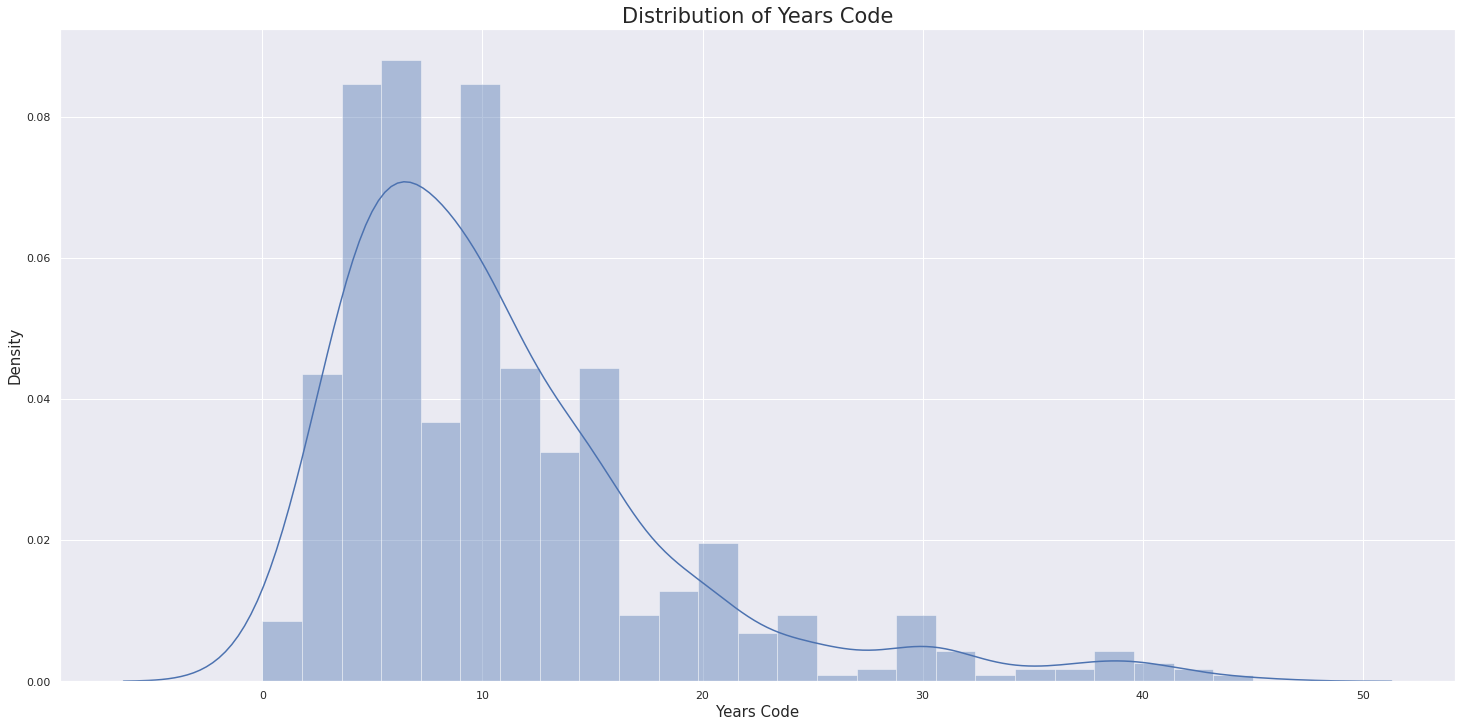

In [189]:
sns.distplot(df_years_code)

# Graph configuration
plt.title('Distribution of Years Code', fontsize=21)
plt.xlabel('Years Code', fontsize=15)
plt.ylabel('Density', fontsize=15)

plt.savefig('./images/years_code')

<AxesSubplot:xlabel='YearsCode'>

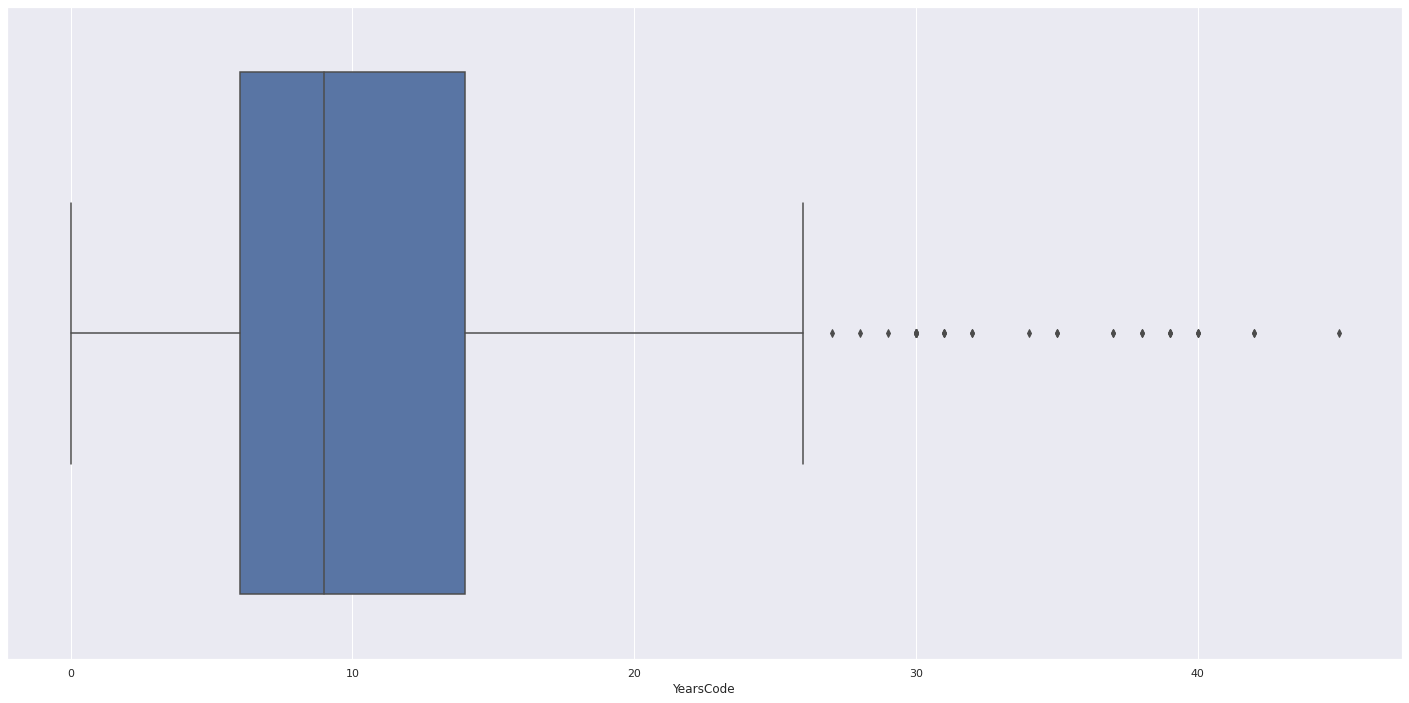

In [190]:
sns.boxplot(x = df_years_code)

In [191]:
df_group_years = pd.cut(x=df_years_code, bins=5).reset_index().groupby('YearsCode').count()
df_group_years['Percentage'] = df_group_years['index'] / np.sum(df_group_years['index'])
df_group_years.columns = ['Count', 'Percentage']

In [192]:
df_group_years

,Count,Percentage
YearsCode,,
"(-0.045, 9.0]",337,0.518462
"(9.0, 18.0]",229,0.352308
"(18.0, 27.0]",51,0.078462
"(27.0, 36.0]",20,0.030769
"(36.0, 45.0]",13,0.020000


## Q3 - What's the average salary for Data Scientists or machine learning especialists

### Salary:
- **Employed part-time**: 35586.45
- **Employed full-time**: 112979.35
- **Independent contractor, freelancer, or self-employed**: 619168.66

In [193]:
df_salary = df4[['Employment', 'ConvertedCompYearly']].groupby('Employment').mean().reset_index().sort_values(by='ConvertedCompYearly')

In [194]:
df_salary.dropna(inplace=True)

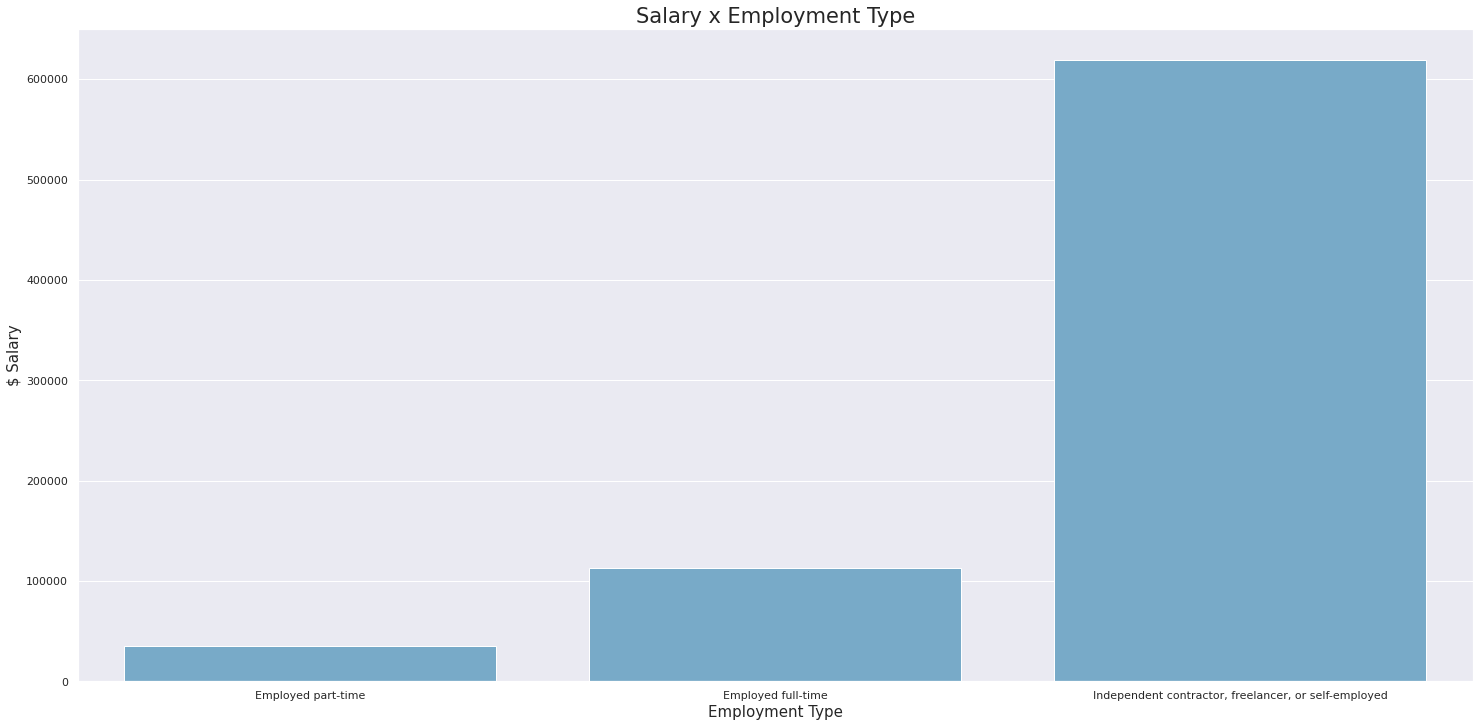

In [195]:
sns.barplot(x='Employment', y='ConvertedCompYearly', data=df_salary, 
            palette=sns.color_palette('Blues', 1))

# Graph configuration
plt.title('Salary x Employment Type', fontsize=21)
plt.xlabel('Employment Type', fontsize=15)
plt.ylabel('$ Salary', fontsize=15)

plt.savefig('./images/salary')

In [196]:
df_salary

,Employment,ConvertedCompYearly
1,Employed part-time,35586.454545
0,Employed full-time,112979.358531
2,"Independent contractor, freelancer, or self-em...",619168.666667


# 5.0. Prepare Data

In [257]:
df5 = df4.copy()

## 5.1. NaN Values

In [258]:
df5.isnull().mean()

ResponseId                0.000000
Employment                0.000000
YearsCode                 0.013657
LanguageHaveWorkedWith    0.009105
DatabaseHaveWorkedWith    0.232170
PlatformHaveWorkedWith    0.280728
ConvertedCompYearly       0.257967
dtype: float64

In [259]:
# ConvertedCompYearly -> drop
df5.dropna(subset=['ConvertedCompYearly'], axis=0, inplace=True)

# YearsCode -> mean.
df5['YearsCode'] = df5['YearsCode'].fillna(df5['YearsCode'].astype('float64').mean()).astype('int64')

# LanguageHaveWorkedWith -> no_response
df5['LanguageHaveWorkedWith'] = df5['LanguageHaveWorkedWith'].fillna('no_response')

# DatabaseHaveWorkedWith -> no_response
df5['DatabaseHaveWorkedWith'] = df5['LanguageHaveWorkedWith'].fillna('no_response')

# PlatformHaveWorkedWith -> no_response
df5['PlatformHaveWorkedWith'] = df5['LanguageHaveWorkedWith'].fillna('no_response')

## 5.2. Encode

In [260]:
df5.isnull().sum()

ResponseId                0
Employment                0
YearsCode                 0
LanguageHaveWorkedWith    0
DatabaseHaveWorkedWith    0
PlatformHaveWorkedWith    0
ConvertedCompYearly       0
dtype: int64

In [261]:
# LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith
# One hot Encoding 

list_columns = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith']

for column in list_columns:
    set_tool = count_list_series(df5, column, only_values=True)

    for tool in set_tool:
        df5[tool] = df5[column].apply(lambda x: 1 if tool in x else 0)

# delete columns
df5 = df5.drop(axis=1, columns=list_columns)

In [262]:
# create dummies
dummies = pd.get_dummies(df5['Employment'])

# merging dummies and exclude the initial column
df5 = pd.merge(left=df5, right=dummies, left_on = df5.index, right_on=dummies.index).drop('Employment', axis=1)

## 5.3. Filter

In [263]:
# drop key_0 em RespondeId columns

df5 = df5.drop(['key_0', 'ResponseId'], axis=1)

In [373]:
# drop outliers

df5 = df5.loc[df5['ConvertedCompYearly'] <= 1000000, :]

## 5.4. Separate Variables

In [374]:
X = df5.drop('ConvertedCompYearly', axis=1)
y = df5.loc[:, 'ConvertedCompYearly']

## 5.5. Train and Test

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6.0. Data Modelling

In [376]:
from sklearn.ensemble import RandomForestRegressor

## 6.1. Baseline - mean

In [377]:
# create a baseline
y_hat_baseline = [y_train.mean() for x in range(0, len(y_test))]

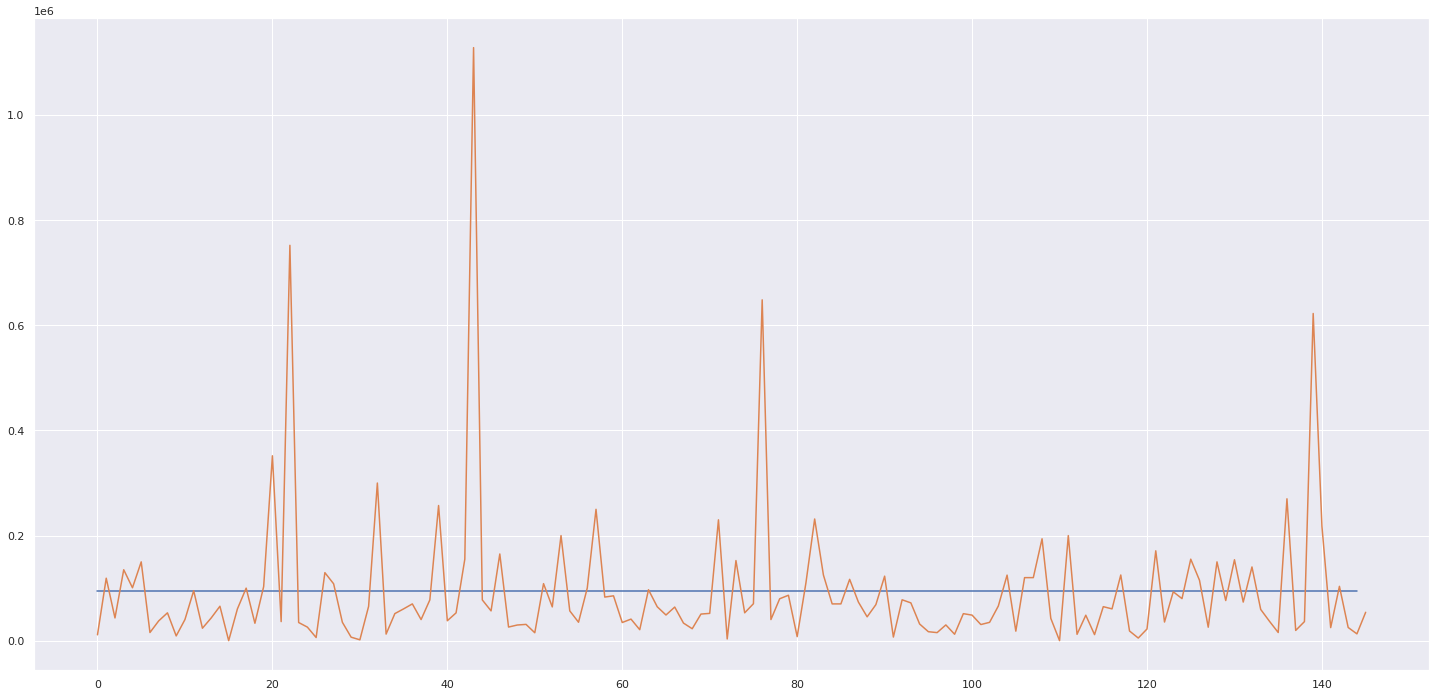

In [378]:
# Y_real x baseline
plt.plot(y_hat_baseline)
plt.plot(y_real)

## 6.2. RandomForestRegressor

In [379]:
# instantiate linear regression
ln_reg = RandomForestRegressor()

In [380]:
# train linear regression
ln_reg.fit(X_train, y_train)

RandomForestRegressor()

In [381]:
# y predict
y_hat = ln_reg.predict(X_test)

# y real
y_real = y_test.values

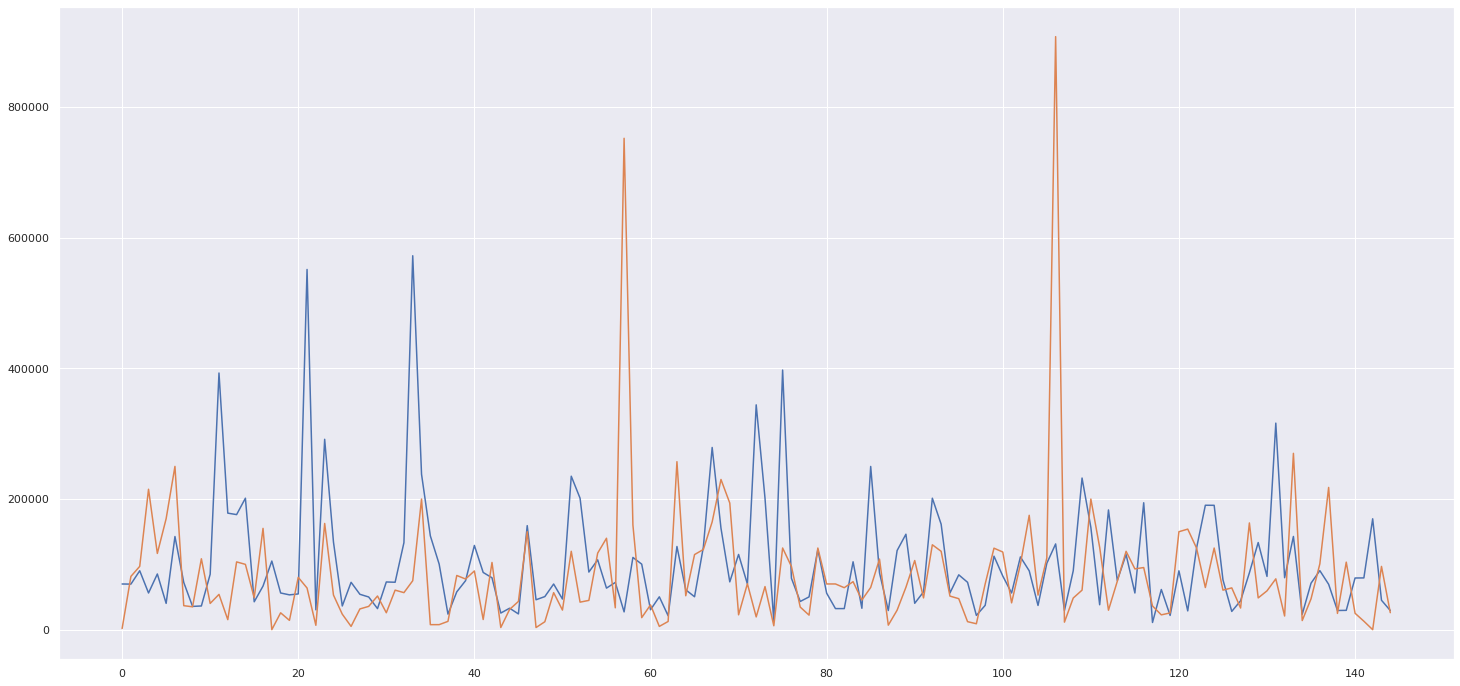

In [382]:
# y_real x model
plt.plot(y_hat)
plt.plot(y_real)

# 7.0. Evaluate the Results

Metric: MAE - Mean Absolute Error - The average absolute error.

The model is no better than a baseline. We must create features, increase the amount of data and test new models to improve performance.

In [409]:
# Mean Absolute Percentage Erro - Baseline
mean_absolute_error(y_real, y_hat_baseline)

62484.826252052546

In [410]:
# Mean Absolute Percentage Error - Model
mean_absolute_error(y_real, y_hat)

73872.65471581924